# Adam


## Adam é de longe o melhor otimizador quando tratamos de trainamento de redes neurias, mas em geral, o desempenho dele é muito bom;

## Adam combina Momento e RMSprop;

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [25]:
class Adam:
    def __init__(self,lr = 0.001,beta = 0.9,beta2 = 0.999,epsilon = 10**-8) -> None:
        self.lr = lr
        self.beta = beta
        self.beta2 = beta2
        self.ep = epsilon
        self.Vdw = 0
        self.Sdw = 0

    def update(self,t,w,dw):
        self.Vdw = self.beta*self.Vdw + (1 - self.beta)*dw
        self.Sdw = self.beta2*self.Sdw + (1 - self.beta2)*(dw**2)
        V_corr = self.Vdw/(1-self.beta**t)
        S_corr = self.Sdw/(1-self.beta2**t)
        w += self.lr*V_corr/(np.sqrt(S_corr) + self.ep)
        return w

In [27]:
opt = [Adam() for i in range(len(w))]
for i in range(10000):
    yhat = f(X_in,w)
    loss = np.mean((y - yhat)**2)
    print('iteração ',i,' loss:',loss)
    for j in range(len(w)):
        dw = ((y-yhat).T @ X_in[:,j])/len(yhat)
        w[j][0] = opt[j].update(i+1,w[j][0],dw[0])

iteração  0  loss: 19187.425846820086
iteração  1  loss: 19140.953824616947
iteração  2  loss: 19094.548221868667
iteração  3  loss: 19048.210158666818
iteração  4  loss: 19001.940744726417
iteração  5  loss: 18955.74107692952
iteração  6  loss: 18909.612236948797
iteração  7  loss: 18863.555288968662
iteração  8  loss: 18817.57127751999
iteração  9  loss: 18771.6612254431
iteração  10  loss: 18725.826131991664
iteração  11  loss: 18680.066971088385
iteração  12  loss: 18634.38468974124
iteração  13  loss: 18588.78020662706
iteração  14  loss: 18543.254410847072
iteração  15  loss: 18497.80816085698
iteração  16  loss: 18452.442283572214
iteração  17  loss: 18407.157573647084
iteração  18  loss: 18361.954792924735
iteração  19  loss: 18316.834670053344
iteração  20  loss: 18271.797900262347
iteração  21  loss: 18226.845145291445
iteração  22  loss: 18181.977033463925
iteração  23  loss: 18137.19415989502
iteração  24  loss: 18092.49708682532
iteração  25  loss: 18047.886344068804
itera

Pesos finais:  [0.9997024  4.99995391 1.07118931]


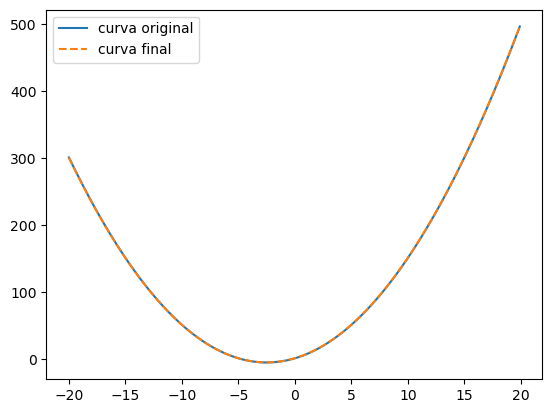

In [28]:
print('Pesos finais: ', w.flatten())

plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()